# Install Dependencies

In [4]:
#!pip install pandas requests

# All Imports

In [35]:
import requests
import time
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download HTML

In [6]:
resource_url = "https://es.wikipedia.org/wiki/Leucocito"
response = requests.get(resource_url)
response

<Response [200]>

In [7]:
# Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
soup = BeautifulSoup(response.text, "html.parser")
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Leucocito - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [8]:
table = soup.find_all("table")
table

[<table class="infobox" style="width:22.7em; line-height: 1.4em; text-align:left; padding:.23em;"><tbody><tr><th class="cabecera medicina" colspan="3" style="text-align:center;background-color:#FFE4BF;color:inherit;color: #000000;;">Leucocito</th></tr><tr><td class="imagen" colspan="3" style="text-align:center;">
 <span typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Red_White_Blood_cells.jpg"><img class="mw-file-element" data-file-height="326" data-file-width="500" decoding="async" height="209" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/24/Red_White_Blood_cells.jpg/320px-Red_White_Blood_cells.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/24/Red_White_Blood_cells.jpg/480px-Red_White_Blood_cells.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/2/24/Red_White_Blood_cells.jpg 2x" width="320"/></a></span><br/><div style="display:inline;">Imagen tomada con un <a href="/wiki/Microscopio_electr%C3%B3nico" title="Microscopio electrónico">microsc

In [9]:
leucocito = soup.find_all("table", class_="wikitable")
leucocito

[<table class="wikitable">
 <tbody><tr>
 <th>Tipo</th>
 <th>Apariencia microscópica</th>
 <th>Diagrama</th>
 <th>Porcentaje aproximado en adultos</th>
 <th>Diámetro (μm)</th>
 <th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
 <th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada"

In [10]:
# Obtener las filas de la tabla
rows = leucocito[0].find_all("tr")

# Inicializar listas para almacenar los datos de las filas y columnas
data = []
columns = []

# Obtener los encabezados de la tabla (nombres de columnas)
for th in rows[0].find_all("th"):
    columns.append(th.text.strip())

# Obtener los datos de las filas
for row in rows[1:]:
    row_data = [td.text.strip() for td in row.find_all("td")]
    data.append(row_data)

# Crear el DataFrame
df = pd.DataFrame(data, columns=columns)
df


,Tipo,Apariencia microscópica,Diagrama,Porcentaje aproximado en adultos,Diámetro (μm),[7]​ Principal objetivo,[4]​ Núcleo,[4]​ Gránulos,[4]​ Vida media[7]​
0,Neutrófilo,,,62%,10-12,Bacterias\nHongos\nVirus,Multilobulado,"Fino, ligeramente rosado (tinción HyE)","6 horas-unos cuantos días, dura días en bazo y..."
1,Eosinófilo,,,2.3%,10-12,Macroparásitos\nModulan respuesta alérgica inf...,Bi-lobulado,Se encuentran en un color rosa-anaranjado,8–12 días; circulan por 4 o 5 horas en el torr...
2,Basófilo,,,0.4%,12-15,Liberan histamina para respuesta inflamatoria,Bi-lobulado o tri-lobulado,Azul oscuro,De pocas horas hasta pocos días
3,Linfocito,,,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...,Linfocitos B: libera anticuerpos y coopera par...,Es excéntrico y se tiñe fuertemente,Células NK y células CD8 citotóxicas,"Años, para células de memoria; y semanas para ..."
4,Monocito,,,5.3%,12-15[8]​,Los monocitos migran desde el torrente sanguín...,Arriñonado,Ninguno,De horas a días


In [11]:
df_c =df.copy

In [19]:
df_c = pd.DataFrame(data, columns=columns)
columnas_seleccionadas = ['Porcentaje aproximado en adultos', 'Diámetro (μm)', 'Tipo']
nuevo_dataframe = df_c[columnas_seleccionadas]
nuevo_dataframe.head()

,Porcentaje aproximado en adultos,Diámetro (μm),Tipo
0,62%,10-12,Neutrófilo
1,2.3%,10-12,Eosinófilo
2,0.4%,12-15,Basófilo
3,30%,Linfocitos pequeños: 7–8 Linfocitos grandes: 1...,Linfocito
4,5.3%,12-15[8]​,Monocito


In [20]:
columnas_seleccionadas = ['Porcentaje aproximado en adultos', 'Diámetro (μm)', 'Tipo']
nuevo_dataframe = df_c[columnas_seleccionadas]

patron_a_eliminar = r'\[8\]'  # Patrón para encontrar [8]
nuevo_dataframe = nuevo_dataframe.replace(patron_a_eliminar, '', regex=True)
cadena_a_eliminar = "Linfocitos pequeños: 7–8 Linfocitos grandes:"
nuevo_dataframe = nuevo_dataframe.replace([cadena_a_eliminar, '%'], '', regex=True)

# Convertir las columnas a tipos numéricos si es necesario
nuevo_dataframe = nuevo_dataframe.apply(pd.to_numeric, errors='ignore')

# Mostrar el nuevo DataFrame con las modificaciones
nuevo_dataframe.head()


,Porcentaje aproximado en adultos,Diámetro (μm),Tipo
0,62.0,10-12,Neutrófilo
1,2.3,10-12,Eosinófilo
2,0.4,12-15,Basófilo
3,30.0,12–15,Linfocito
4,5.3,12-15​,Monocito


# Visualization

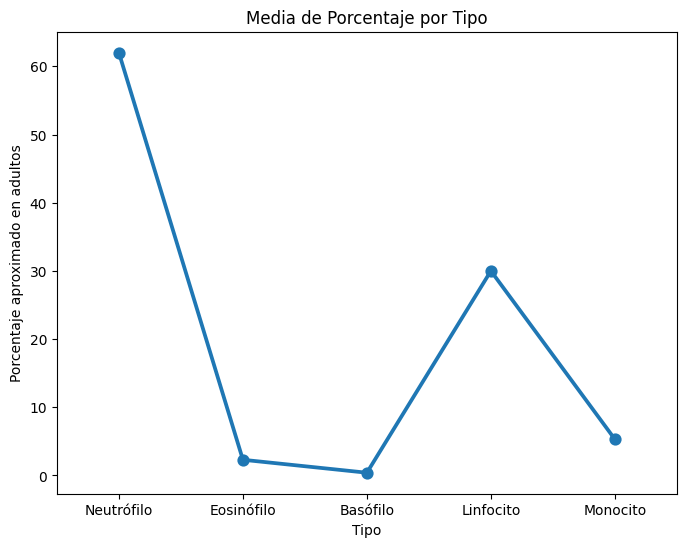

In [27]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=nuevo_dataframe, x='Tipo', y='Porcentaje aproximado en adultos')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje aproximado en adultos')
plt.title('Media de Porcentaje por Tipo')
plt.show()


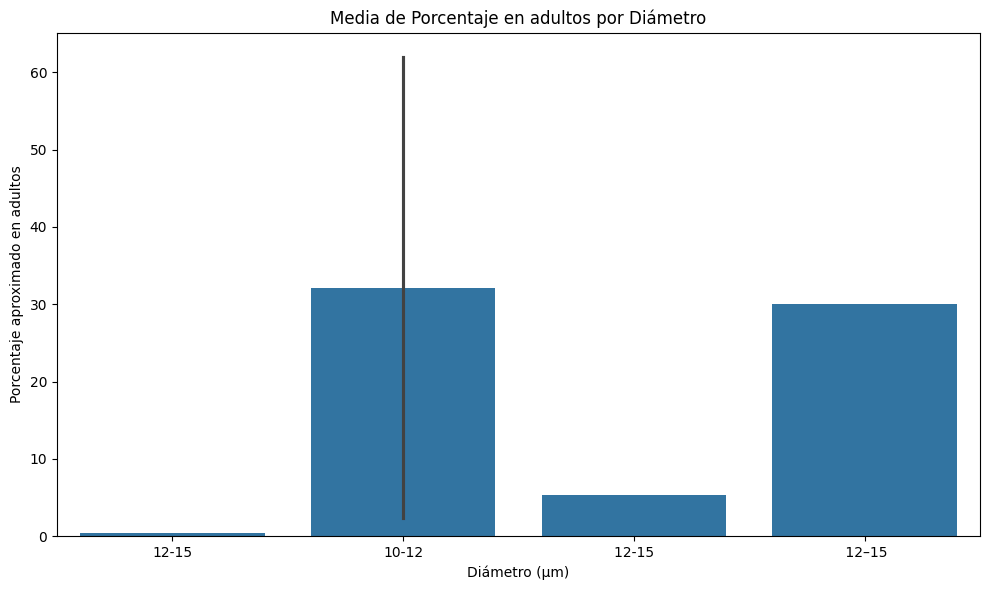

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'nuevo_dataframe' es tu DataFrame con las columnas 'Porcentaje aproximado en adultos' y 'Diámetro (μm)'

# Agrupar por 'Porcentaje aproximado en adultos' y 'Diámetro (μm)' y calcular la media
grouped_data = nuevo_dataframe.groupby(['Porcentaje aproximado en adultos', 'Diámetro (μm)']).mean().reset_index()

# Crear el gráfico de barras con ejes intercambiados
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Diámetro (μm)', y='Porcentaje aproximado en adultos')
plt.xlabel('Diámetro (μm)')
plt.ylabel('Porcentaje aproximado en adultos')
plt.title('Media de Porcentaje en adultos por Diámetro')
plt.tight_layout()
plt.show()


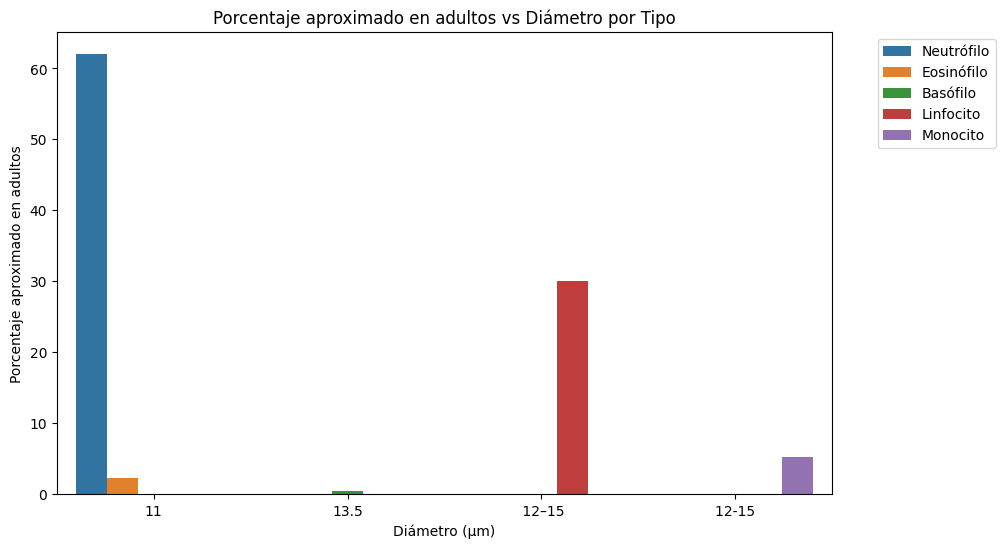

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nuevo_dataframe, y='Porcentaje aproximado en adultos', x='Diámetro (μm)', hue='Tipo', errorbar=None)
plt.title('Porcentaje aproximado en adultos vs Diámetro por Tipo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Store in SQL

In [ ]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [ ]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE Leucos ('Porcentaje aproximado en adultos', 'Diámetro (μm)', 'Tipo)""")

In [36]:
df_c_tuples = list(df_c.to_records(index = False))
df_c_tuples[:5]

[('Neutrófilo', '', '', '62%', '10-12', 'Bacterias\nHongos\nVirus', 'Multilobulado', 'Fino, ligeramente rosado (tinción HyE)', '6 horas-unos cuantos días, dura días en bazo y otros tejidos.'),
 ('Eosinófilo', '', '', '2.3%', '10-12', 'Macroparásitos\nModulan respuesta alérgica inflamatoria', 'Bi-lobulado', 'Se encuentran en un color rosa-anaranjado', '8–12 días; circulan por 4 o 5 horas en el torrente sanguíneo.'),
 ('Basófilo', '', '', '0.4%', '12-15', 'Liberan histamina para respuesta inflamatoria', 'Bi-lobulado o tri-lobulado', 'Azul oscuro', 'De pocas horas hasta pocos días'),
 ('Linfocito', '', '', '30%', 'Linfocitos pequeños: 7–8 Linfocitos grandes: 12–15', 'Linfocitos B: libera anticuerpos y coopera para la activación de linfocitos T\nLinfocitos T: Inmunidad celular\nCélulas CD4 cooperadoras: activan y regulan linfocitos T y B.\nCélulas CD8 citotóxicas: destruyen células infectadas por virus y células tumorales por apoptosis.\nCélulas Tδ: funcionan como un puente entre la inmuni

In [ ]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [ ]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)